In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [3]:
df = pd.read_csv("eda_data.csv") 
df.columns

Index(['Unnamed: 0', 'Job Title', 'Salary Estimate', 'Job Description',
       'Rating', 'Company Name', 'Location', 'Headquarters', 'Size', 'Founded',
       'Type of ownership', 'Industry', 'Sector', 'Revenue', 'Competitors',
       'hourly', 'employer_provided', 'min_salary', 'max_salary',
       'mean_salary', 'company_txt', 'job_state', 'same_state', 'age',
       'python', 'python_yn', 'R_yn', 'Spark_yn', 'AWS_yn', 'Excel_yn',
       'Tableau_yn', 'Tensorflow_yn', 'Matlab_yn', 'Scikit_yn', 'Sas_yn',
       'job_simp', 'seniority', 'desc_len'],
      dtype='object')

In [4]:
# choose relevant columns
df_model = df[['mean_salary','Rating','Size','Type of ownership','Industry','Sector','Revenue','Competitors','hourly','employer_provided',
             'job_state','same_state','age','python_yn','Spark_yn','AWS_yn','Excel_yn','Tableau_yn','Tensorflow_yn','Matlab_yn','Scikit_yn','Sas_yn','job_simp','seniority','desc_len']]

In [5]:
# get dummy data
df_dum = pd.get_dummies(df_model)
df_dum.head()

,mean_salary,Rating,Competitors,hourly,employer_provided,same_state,age,python_yn,Spark_yn,AWS_yn,...,job_simp_analyst,job_simp_data engineer,job_simp_data scientist,job_simp_director,job_simp_manager,job_simp_mle,job_simp_na,seniority_jr,seniority_na,seniority_senior
0,72.0,3.8,0,0,0,0,47,1,0,0,...,0,0,1,0,0,0,0,0,1,0
1,87.5,3.4,0,0,0,0,36,1,0,0,...,0,0,1,0,0,0,0,0,1,0
2,85.0,4.8,0,0,0,1,10,1,1,0,...,0,0,1,0,0,0,0,0,1,0
3,76.5,3.8,3,0,0,1,55,1,0,0,...,0,0,1,0,0,0,0,0,1,0
4,114.5,2.9,3,0,0,1,22,1,0,0,...,0,0,1,0,0,0,0,0,1,0


In [6]:
# train test split
from sklearn.model_selection import train_test_split
X = df_dum.drop('mean_salary',axis=1)
y = df_dum.mean_salary.values
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=.2)

In [7]:
# multiple linear regression
import statsmodels.api as sm
X_sm = X = sm.add_constant(X)
model = sm.OLS(y,X_sm)
model.fit().summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.715
Model:                            OLS   Adj. R-squared:                  0.644
Method:                 Least Squares   F-statistic:                     10.12
Date:                Fri, 26 Mar 2021   Prob (F-statistic):           7.97e-95
Time:                        15:41:32   Log-Likelihood:                -3302.8
No. Observations:                 742   AIC:                             6902.
Df Residuals:                     594   BIC:                             7584.
Df Model:                         147                                         
Covariance Type:            nonrobust                                         
=====================================================================================================================
                                                        coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------------------
const                                                42.9762      6.714      6.401      0.000      29.790      56.163
Rating                                                3.2297      1.935      1.669      0.096      -0.572       7.031
Competitors                                           2.3675      0.869      2.724      0.007       0.661       4.074
hourly                                              -35.7757      9.137     -3.916      0.000     -53.720     -17.832
employer_provided                                    33.0710     11.583      2.855      0.004      10.323      55.819
same_state                                            3.2956      2.624      1.256      0.210      -1.857       8.449
age                                                   0.0375      0.030      1.250      0.212      -0.021       0.096
python_yn                                             7.3845      2.607      2.833      0.005       2.265      12.504
Spark_yn                                             -1.2263      3.030     -0.405      0.686      -7.177       4.725
AWS_yn                                                1.5849      2.750      0.576      0.565      -3.815       6.985
Excel_yn                                             -0.4562      2.264     -0.202      0.840      -4.902       3.989
Tableau_yn                                           -6.4611      2.968     -2.177      0.030     -12.291      -0.631
Tensorflow_yn                                         4.1001      4.116      0.996      0.320      -3.984      12.185
Matlab_yn                                             7.8503      4.372      1.796      0.073      -0.735      16.436
Scikit_yn                                             6.5833      4.772      1.380      0.168      -2.788      15.955
Sas_yn                                                4.2355      3.306      1.281      0.201      -2.257      10.728
desc_len                                             -0.0002      0.001     -0.248      0.804      -0.002       0.001
Size_-1                                              13.4102      8.573      1.564      0.118      -3.427      30.248
Size_1 to 50 employees                                2.5553      6.463      0.395      0.693     -10.138      15.248
Size_10000+ employees                                -3.4154      5.800     -0.589      0.556     -14.807       7.976
Size_1001 to 5000 employees                           5.9607      3.886      1.534      0.126      -1.672      13.594
Size_201 to 500 employees                             2.5992      3.882      0.670      0.503      -5.024      10.223
Size_5001 to 10000 employees                         -4.9221      5.455     -0.902      0.367     -15.635       5.791
Size_501 to 100

In [8]:
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.model_selection import cross_val_score

lm = LinearRegression()
lm.fit(X_train, y_train)

np.mean(cross_val_score(lm,X_train,y_train, scoring = 'neg_mean_absolute_error'))

-30768659.68325898

In [9]:
# lasso regression
lm_l = Lasso(alpha=.21)
lm_l.fit(X_train,y_train)
np.mean(cross_val_score(lm_l,X_train,y_train, scoring = 'neg_mean_absolute_error', cv= 3))

-20.80495831692274

Best alpha: 


,alpha,error
30,0.31,-20.644517


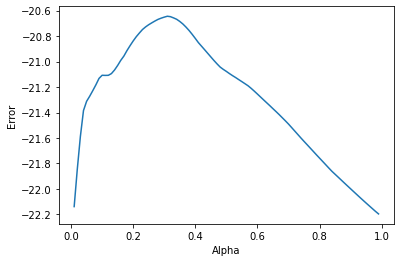

In [10]:
alpha = []
error = []

for i in range(1,100):
    alpha.append(i/100)
    lml = Lasso(alpha=(i/100))
    error.append(np.mean(cross_val_score(lml,X_train,y_train, scoring = 'neg_mean_absolute_error', cv= 3)))

plt.plot(alpha,error)
plt.xlabel("Alpha")
plt.ylabel("Error")

print('Best alpha: ')
err = tuple(zip(alpha,error))
df_err = pd.DataFrame(err,columns=['alpha','error'])
df_err[df_err.error == max(df_err.error)]

In [11]:
# random forest
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor()

np.mean(cross_val_score(rf, X_train,y_train,scoring = 'neg_mean_absolute_error', cv= 3))

-15.795346442427663

In [12]:
# tune models GridsearchCV
from sklearn.model_selection import GridSearchCV
parameters = {'n_estimators': range(10,100,10), 'criterion':('mse','mae'),'max_features':('auto','sqrt','log2')}

gs = GridSearchCV(rf,parameters,scoring='neg_mean_absolute_error',cv=3)
gs.fit(X_train,y_train)

GridSearchCV(cv=3, estimator=RandomForestRegressor(),
             param_grid={'criterion': ('mse', 'mae'),
                         'max_features': ('auto', 'sqrt', 'log2'),
                         'n_estimators': range(10, 100, 10)},
             scoring='neg_mean_absolute_error')

In [13]:
gs.best_score_
gs.best_estimator_

RandomForestRegressor(criterion='mae', n_estimators=80)

In [14]:
# test ensembles

#Linear Regresion
tpred_lm = lm.predict(X_test)
#Lasso
tpred_lml = lm_l.predict(X_test)
#RandomForest
tpred_rf = gs.best_estimator_.predict(X_test)

In [15]:
from sklearn.metrics import mean_absolute_error
print("Linear Regression MAE: ",mean_absolute_error(y_test,tpred_lm))
print("Linear Regression LASSO MAE: ",mean_absolute_error(y_test,tpred_lml))
print("Random Forest MAE: ",mean_absolute_error(y_test,tpred_rf))

Linear Regression MAE:  12270635.153219618
Linear Regression LASSO MAE:  17.761137299258326
Random Forest MAE:  11.581543624161073


In [17]:
#Picke model
import pickle
pickl = {'model': gs.best_estimator_}
pickle.dump( pickl, open( 'model_file' + ".p", "wb" ) )

file_name = "model_file.p"
with open(file_name, 'rb') as pickled:
    data = pickle.load(pickled)
    model = data['model']
    
    
model.predict(np.array(list(X_test.iloc[1,:])).reshape(1,-1))[0]

list(X_test.iloc[1,:])

[2.7,
 0.0,
 0.0,
 0.0,
 1.0,
 59.0,
 0.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 3776.0,
 0.0,
 0.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
